## Experiments 202

In [1]:
# Main script for simulations.
# Author: @THEFFTKID, @cami_cusi 

# Gym stuff
import gymnasium as gym
import environment as ENV

# Stable baselines
from stable_baselines3 import A2C

# Other libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def label_data(
    data: pd.DataFrame
    ):
  data['Difference'] = data['Close'].diff()
  data['Label'] = np.sign(data['Difference'].fillna(0)).astype(int)
  return data

In [24]:
# Read data.
# TODO: Add data reader call.
df = pd.read_csv('SPY_data.csv')

In [25]:
df.shape

(1718, 7)

In [27]:
df = label_data(df)

In [30]:
# Select just a small subset of data.
df_train = df.iloc[:1500]

In [31]:
df_test = df.iloc[1500:]

In [6]:
# 2. Creation of the environment.
env = ENV.TradingEnv(df=df_train, window_size=5)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (5, 2), float32)


In [9]:
# 4. Train Environment
model = A2C('MlpPolicy', env, verbose=0) 
model.learn(total_timesteps=100)

381.3999938964844 382.9100036621094
-0.3943510880320263
376.6600036621094 381.3999938964844
-1.2427871814967775
383.44000244140625 376.6600036621094
1.8000315173837815
382.4299926757813 383.44000244140625
-0.2634075107432964
380.8200073242187 382.4299926757813
-0.4209882546862731
383.760009765625 380.8200073242187
0.7720189025949147
379.3800048828125 383.760009765625
-1.1413395797773496
388.0799865722656 379.3800048828125
2.293210389973104
387.8599853515625 388.0799865722656
-0.056689658914466555
390.5799865722656 387.8599853515625
0.7012843096556279
395.5199890136719 390.5799865722656
1.2647863718670707
396.9599914550781 395.5199890136719
0.36407829728081675
398.5 396.9599914550781
0.38795056884118
397.7699890136719 398.5
-0.18318970798698245
391.489990234375 397.7699890136719
-1.5788015568668312
388.6400146484375 391.489990234375
-0.7279817254666697
395.8800048828125 388.6400146484375
1.862903962919071
400.6300048828125 395.8800048828125
1.1998585281936844
400.2000122070313 400.63000

In [10]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=3, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [45]:
# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
window = 5
env = ENV.TradingEnv(df=df_test, window_size = window)
observation, info = env.reset()
while True: 
    observation = observation[np.newaxis, ...]
    action, _states = model.predict(observation)
    observation, rewards, done, truncated, info = env.step(action)
    if done or truncated:
        print("info", info)
        break

381.3999938964844 382.9100036621094
-0.3943510880320263
376.6600036621094 381.3999938964844
-1.2427871814967775
383.44000244140625 376.6600036621094
1.8000315173837815
382.4299926757813 383.44000244140625
-0.2634075107432964
380.8200073242187 382.4299926757813
-0.4209882546862731
383.760009765625 380.8200073242187
0.7720189025949147
379.3800048828125 383.760009765625
-1.1413395797773496
388.0799865722656 379.3800048828125
2.293210389973104
387.8599853515625 388.0799865722656
-0.056689658914466555
390.5799865722656 387.8599853515625
0.7012843096556279
395.5199890136719 390.5799865722656
1.2647863718670707
396.9599914550781 395.5199890136719
0.36407829728081675
398.5 396.9599914550781
0.38795056884118
397.7699890136719 398.5
-0.18318970798698245
391.489990234375 397.7699890136719
-1.5788015568668312
388.6400146484375 391.489990234375
-0.7279817254666697
395.8800048828125 388.6400146484375
1.862903962919071
400.6300048828125 395.8800048828125
1.1998585281936844
400.2000122070313 400.63000

In [62]:
env._process_data

<bound method TradingEnv._process_data of <environment.TradingEnv object at 0x1565933a0>>

In [56]:
y_pred = np.concatenate(env._actions_history)
y_pred[y_pred == 2] = -1 #Convertir 2 a -1


In [72]:
y_true = df_test[window:len(df_test)-1]['Label']

In [89]:
print(set(y_true))
print(set(y_pred))

{0, 1, -1}
{0, 1, -1}


In [76]:
import sklearn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [86]:
target_names = [
    'Bajar', 
    'Mantener', 
    'Subir']
# 2 = bajar ****** Cambiamos de 2 a -1 para mantener el signo
# 1 = subir
# 0 = neutral
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Bajar       0.57      0.12      0.20       101
    Mantener       0.03      1.00      0.06         1
       Subir       0.56      0.81      0.66       110

    accuracy                           0.48       212
   macro avg       0.39      0.64      0.31       212
weighted avg       0.56      0.48      0.44       212



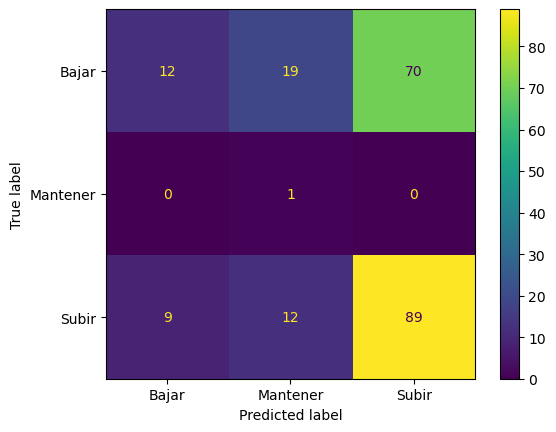

In [87]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
disp.plot()
plt.show()

# Testing

In [50]:
# 5. Test Environment
# observation, info = env.reset()

# while True:
#     # Get the policy action from an observation.
#     action, _states = model.predict(observation)


#     observation, reward, terminated, truncated, info = env.step(action)
#     done = terminated or truncated

#     if done:
#         break

# env.close()
# print("info:", info)

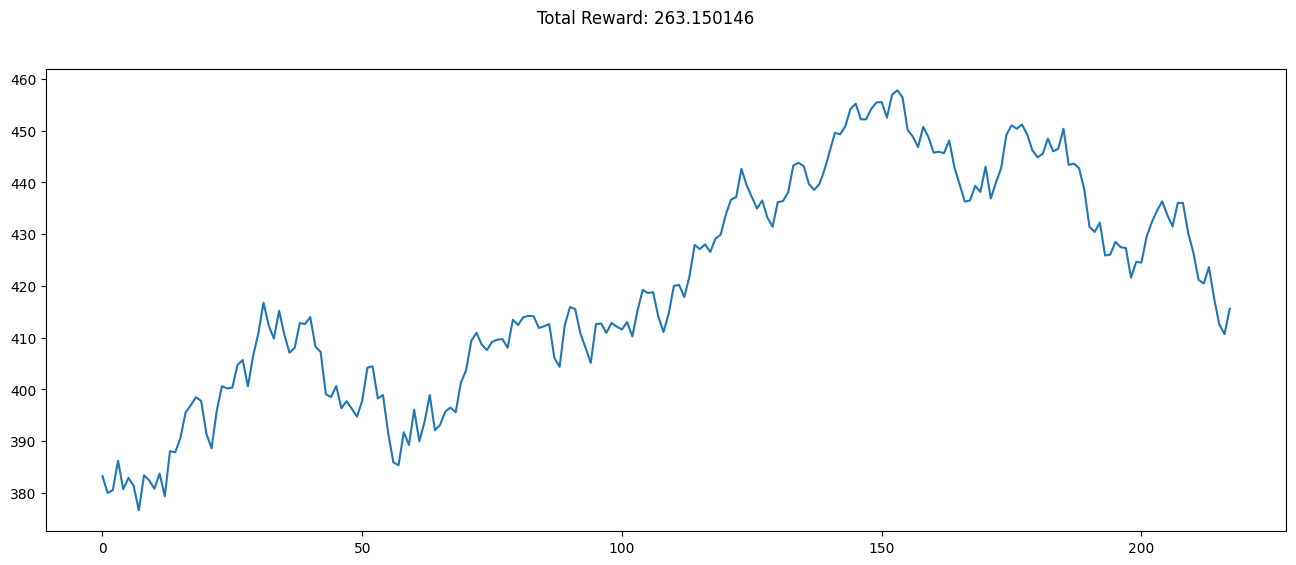

In [51]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()